In [6]:
import numpy as np
from scipy.optimize import minimize, linear_sum_assignment, linprog, LinearConstraint, Bounds

In [6]:
# github习题1
minfunc = [2, 3, -1] 
A_ub = [[1, 1, 3], [0, 2, -1], [-3, 1, 4]]
B_ub = [100, -15, -40]
A_eq = [[1, 1, 1]]
B_eq = [70]
bounds = [0, None]

result = linprog(minfunc, A_ub, B_ub, A_eq, B_eq, bounds)

if result.success:
    output = f"x: {result.x}, minc: {result.fun}"
    print(output)
else:
    print(f"error: {result.message}")


x: [55.  0. 15.], minc: 95.0


In [12]:
minfunc = np.array([3, -1, -1]) 
A_ub = np.array([[1, -2, 1], [4, -1, -2]])
B_ub = np.array([11, -3])
A_eq = np.array([[-2, 0, 1]])
B_eq = np.array([1])
bounds = np.array([0, None])

result = linprog(-minfunc, A_ub, B_ub, A_eq, B_eq, bounds)

if result.success:
    output = f"x: {result.x}, maxc: {-result.fun}"
    print(output)
else:
    print(f"error: {result.message}")

x: [4. 1. 9.], maxc: 2.0


In [22]:
#2.非线性规划(p31非整数)
c1=np.array([1,1,3,4,2]); c2=np.array([-8,-2,-3,-1,-2])
A=np.array([[1,1,1,1,1],[1,2,2,1,6],
            [2,1,6,0,0],[0,0,1,1,5]])
b=np.array([400,800,200,200])
obj=lambda x: np.dot(-c1,x**2)+np.dot(-c2,x)
# np.dot()向量点乘或矩阵乘法
cons={'type':'ineq','fun':lambda x:b-A@x}
bd=[(0,99) for i in range(A.shape[1])]
#res=minimize(obj,np.ones(5)*90,constraints=cons,bounds=bd)
res=minimize(obj,np.ones(5),constraints=cons,bounds=bd, method='SLSQP')
print(res.fun) 
print(res.success) 
print(res.x) 

-42677.56888853209
True
[3.87170949e-11 0.00000000e+00 3.33333333e+01 9.90000000e+01
 1.35333333e+01]


In [6]:
#pulp举例
import pulp
# Instantiate our problem class
model = pulp.LpProblem("Profit_maximising_problem", pulp.LpMaximize)

A = pulp.LpVariable('A', lowBound=0, cat='Integer')
B = pulp.LpVariable('B', lowBound=0, cat='Integer')

# Objective function
model += 30000 * A + 45000 * B, "Profit"

# Constraints
model += 3 * A + 4 * B <= 30
model += 5 * A + 6 * B <= 60
model += 1.5 * A + 3 * B <= 21

# Solve our problem
model.solve()
print(pulp.LpStatus[model.status])

# Print our decision variable values
print("Production of Car A = {}".format(A.varValue))
print("Production of Car B = {}".format(B.varValue))
print(f"{pulp.value(model.objective)}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/tt/2pywz1vd2877bd78p3q3v99h0000gn/T/301b18f4ed6641a8a794332310681bda-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/tt/2pywz1vd2877bd78p3q3v99h0000gn/T/301b18f4ed6641a8a794332310681bda-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 21 RHS
At line 25 BOUNDS
At line 28 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 330000 - 0.00 seconds
Cgl0004I processed model has 3 rows, 2 columns (2 integer (0 of which binary)) and 6 elements
Cutoff increment increased from 1e-05 to 15000
Cbc0012I Integer solution of -330000 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 

In [43]:
#遗传算法(p31 3.3)
import numpy as np
from sko.GA import GA
import matplotlib.pyplot as plt
import pandas as pd

def objectfunc(x):
    A = [1, 1, 3, 4, 2]
    B = [-8, -2, -3, -1, -2]
    return -(A @ (x**2) + B @ x)

constraint_ueq = [
    lambda x: x[0] + x[1] + x[2] + x[3] + x[4] - 400,
    lambda x: x[0] + 2 * x[1] + 2 * x[2] + x[3] + 6 * x[4] - 800,
    lambda x: 2 * x[0] + x[1] + 6 * x[2] - 200,
    lambda x: x[2] + x[3] + 5 * x[4] - 200
]
ga = GA(objectfunc, 5, 70, 5000, 0.01, 0, 99, constraint_ueq=constraint_ueq, precision=[1, 1, 1, 1, 1])
variables, z= ga.run()
print(f"x1 = {variables[0]}, x2 = {variables[1]}, x3 = {variables[2]}, x4 = {variables[3]}, x5 = {variables[4]}\n z = {-z}")

x1 = 50.0, x2 = 99.0, x3 = 0.0, x4 = 99.0, x5 = 20.0
 z = [51568.]


In [66]:
#(p30, 3.2)
import pulp
problem = pulp.LpProblem("one", pulp.LpMinimize)

x = pulp.LpVariable("x", 0, None, "Integer")
y = [pulp.LpVariable(f"y{i}", 0, None, "Integer") for i in range(8)]

problem += x

problem += x - 2 * y[0] == 1
problem += x - 3 * y[1] == 0
problem += x - 4 * y[2] == 1
problem += x - 5 * y[3] == 4
problem += x - 6 * y[4] == 3
problem += x - 7 * y[5] == 4
problem += x - 8 * y[6] == 1
problem += x - 9 * y[7] == 0

problem.solve()

print(f"x = {x.varValue}, minsize = {pulp.value(problem.objective)}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/tt/2pywz1vd2877bd78p3q3v99h0000gn/T/682359063ae24f4491d97f9db8026e68-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/tt/2pywz1vd2877bd78p3q3v99h0000gn/T/682359063ae24f4491d97f9db8026e68-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 49 RHS
At line 58 BOUNDS
At line 68 ENDATA
Problem MODEL has 8 rows, 9 columns and 16 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4 - 0.00 seconds
Cgl0003I 0 fixed, 18 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 14 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 14 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 1

In [73]:
#optimize.minimize示例
from scipy.optimize import minimize
import numpy as np

def objectfunc(x):
    c1 = np.array([2, 3, 1])
    c2 = np.array([3, 1, 0])
    return -(c1 @ x + c2 @ x**2)

x0 = np.array([0, 0, 0])

constraint = (
    {'type': 'ineq', 'fun': lambda x: -(x[0] + 2 * x[0]**2 + x[1] + 2 * x[1] ** 2 + x[2] - 10)},
    {'type': 'ineq', 'fun': lambda x: -(x[0] + x[0]**2 + x[1] + x[1]**2 - x[2] -50)},
    {'type': 'ineq', 'fun': lambda x: -(2 * x[0] + x[0]**2 + 2 * x[1] + x[2] - 40)},
    {'type': 'eq', 'fun': lambda x: x[0]**2 + x[2] - 2},
    {'type': 'ineq', 'fun': lambda x: x[0] + 2 * x[1] - 1},
    {'type': 'ineq', 'fun': lambda x: x[0]}
)

result = minimize(objectfunc, x0, constraints=constraint)
print(f"x1 = {result.x[0]}, x2 = {result.x[1]}, x3 = {result.x[2]}, max = {-result.fun}")


x1 = 2.3333333351688106, x2 = 0.16666666042668327, x3 = -3.4444444530094813, max = 18.083333333335986


In [38]:
#TOPSIS法(p411,示例)
import numpy as np

rawData = np.array([[0.1, 5, 5000, 4.7],
                    [0.2, 6, 6000, 5.6],
                    [0.4, 7, 7000, 6.7],
                    [0.9, 10, 10000, 2.3],
                    [1.2, 2, 400, 1.8]])

# 数据预处理
# 区间型属性规范化
def intervalNormalization(rawData, chooseCol, interval, min, max):
    row, col = rawData.shape
    for i in range(row):
        if rawData[i][chooseCol] < interval[0] and rawData[i][chooseCol] >= min:
            rawData[i][chooseCol] = 1 - (interval[0] - rawData[i][chooseCol]) / (interval[0] - min)
        elif rawData[i][chooseCol] > interval[1] and rawData[i][chooseCol] <= max:
            rawData[i][chooseCol] = 1 - (rawData[i][chooseCol] - interval[1]) / (max - interval[1])
        elif rawData[i][chooseCol] >= interval[0] and rawData[i][chooseCol] <= interval[1]:
            rawData[i][chooseCol] = 1
        else:
            rawData[i][chooseCol] = 0
    return rawData

# 向量规范化
def vectorNormalization(rawData):
    return rawData / np.sqrt(np.sum(rawData ** 2, axis=0))

# 数据预处理函数
def preProcess(rawData):
    row, col = rawData.shape
    rawData = intervalNormalization(rawData, 1, (5, 6), 2, 12)
    return vectorNormalization(rawData)
    
processData = preProcess(rawData)

# 构造加权规范化矩阵
w = [0.2, 0.3, 0.4, 0.1]
processData = w * processData

# 确定正理想解和负理想解
idealSolution = np.max(processData[:, 0:3], axis=0)
idealSolution = np.append(idealSolution, np.min(processData[:, 3], axis=0))
negativeSolution = np.min(processData[:, 0:3], axis=0)
negativeSolution = np.append(negativeSolution, np.max(processData[:, 3], axis=0))

# 计算各方案到正理想解和负理想解的距离
row, col = processData.shape
positiveDistance = np.zeros((row, 1))
negativeDistance = np.zeros((row, 1))
for i in range(row):
    positiveDistance[i] = np.sqrt(np.sum((processData[i, :] - idealSolution) ** 2))
    negativeDistance[i] = np.sqrt(np.sum((processData[i, :] - negativeSolution) ** 2))

# 计算各方案的综合评价指数
def calculateComprehensiveEvaluationIndex(positiveDistance, negativeDistance):
    return negativeDistance / (positiveDistance + negativeDistance)

comprehensiveEvaluationIndex = calculateComprehensiveEvaluationIndex(positiveDistance, negativeDistance)

# 输出各方案的综合评价指数
for i in range(5):
    print(f"方案{i + 1}的综合评价指数为：{comprehensiveEvaluationIndex[i][0]}")

方案1的综合评价指数为：0.525813800160824
方案2的综合评价指数为：0.578738724731772
方案3的综合评价指数为：0.6255115354408003
方案4的综合评价指数为：0.7002782166246625
方案5的综合评价指数为：0.3164914795793433


In [19]:
# 一级模糊综合评价(p417,示例)
import numpy as np

# 确定因素集 
U = ['政治表现u1', '工作能力u2', '工作态度u3', '工作成绩u4']

# 确定评语集 
V = ['优秀v1', '良好v2', '一般v3', '较差v4', '差v5']

# 确定各因素权重向量
A = np.array([[0.25, 0.2, 0.25, 0.3]]) 

# 确定模糊综合评判矩阵
R1 = np.array([0.1, 0.5, 0.4, 0, 0])
R2 = np.array([0.2, 0.5, 0.2, 0.1, 0])
R3 = np.array([0.2, 0.5, 0.3, 0, 0])
R4 = np.array([0.2, 0.6, 0.2, 0, 0])

R = np.vstack((R1, R2, R3, R4))

# 模糊综合评判
B = A @ R

# 取B的最大值
result = np.max(B, axis=1)

# 根据最大值输出评语
row, col = np.where(B==result)
col = int(col)
print(f"评语为：{V[col]}")

评语为：良好v2


In [43]:
# 多层次模糊综合评价(二级)(p419,示例)
import numpy as np
import pandas as pd

#导入数据
rawData = pd.read_table(r'~/Desktop/竞赛/数学建模/程序及数据/14第14章  综合评价与决策方法/data14_3.txt', sep='\t', header=None)

# 确定因素集
U = ['工作绩效U1', '工作态度U2', '工作能力U3', '学习特长U4']
U1 = ['工作量', '工作效率', '工作质量', '计划性']
U2 = ['责任感', '团队精神', '学习态度', '工作主动性', '满意度'] 
U3 = ['创新能力', '自我管理能力', '沟通能力', '协调能力', '执行能力']
U4 = ['勤情评价', '技能提高', '培训参与', '工作提案']

# 确定评语集
V = ['优秀', '良好', '一般', '较差', '差']

# 确定各因素权重向量
A = np.array([[0.4, 0.3, 0.2, 0.1]])
A1 = np.array([[0.2, 0.3, 0.3, 0.2]])
A2 = np.array([[0.3, 0.2, 0.1, 0.2, 0.2]])
A3 = np.array([[0.1, 0.2, 0.3, 0.2, 0.2]])
A4 = np.array([[0.3, 0.2, 0.2, 0.3]])

# 对各个子因素集进行一级模糊综合评判
R1 = rawData.iloc[0:4, :].values
R2 = rawData.iloc[4:9, :].values
R3 = rawData.iloc[9:14, :].values
R4 = rawData.iloc[14:18, :].values
B1 = A1 @ R1
B2 = A2 @ R2
B3 = A3 @ R3
B4 = A4 @ R4
R = np.vstack((B1, B2, B3, B4))

# 进行二级综合评判
B = A @ R

# 取B的最大值
result = np.max(B, axis=1)

# 根据最大值输出评语
row, col = np.where(B==result)
col = int(col)
print(f"评语为：{V[col]}")

评语为：良好


In [6]:
# 主成分分析法(p427,示例)
import numpy as np
import pandas as pd

# 导入数据
rawData = pd.read_table(r'~/Desktop/竞赛/数学建模/程序及数据/14第14章  综合评价与决策方法/data14_7.txt', sep='\t', header=None)

# 数据预处理
def preProcess(rawData, row, col):
    Data = rawData.copy()
    for j in range(col):
        u = np.mean(Data[:, j])
        s = np.std(Data[:, j], ddof=1)
        for i in range(row):
            Data[i][j] = (Data[i][j] - u) / s
    return Data

row, col = rawData.shape
proData = preProcess(rawData.values, row, col)

# 计算相关系数矩阵
def calculateCorrelationCoefficientMatrix(proData, row, col):
    correlationCoefficientMatrix = np.zeros((col, col))
    for i in range(col):
        for j in range(col):
            for k in range(row):
                correlationCoefficientMatrix[i][j] += proData[k][i] * proData[k][j]
            correlationCoefficientMatrix[i][j] /= (row - 1)
    return correlationCoefficientMatrix

correlationCoefficientMatrix = calculateCorrelationCoefficientMatrix(proData, row, col)

# 计算特征值和特征向量
eigenvalue, eigenvector = np.linalg.eig(correlationCoefficientMatrix)

# 处理特征向量正负号
def handleEigenvector(eigenvector):
    sumVector = np.sum(eigenvector, axis=0)
    f = np.sign(sumVector)
    result = eigenvector * f
    return result

eigenvector = handleEigenvector(eigenvector)

# 选择主成分，计算综合评价值
def calculateComprehensiveEvaluationValue(eigenvalue, proData, col):
    comprehensiveEvaluationValue = np.zeros((col))
    totalEvaluationValue = np.zeros((col))
    for j in range(col): 
        comprehensiveEvaluationValue[j] = eigenvalue[j] / np.sum(eigenvalue) 
    for p in range(col):
        if p == 0 :
            totalEvaluationValue[p] = comprehensiveEvaluationValue[p]
        else:
            totalEvaluationValue[p] = totalEvaluationValue[p - 1] + comprehensiveEvaluationValue[p]
    return comprehensiveEvaluationValue, totalEvaluationValue

comprehensiveEvaluationIndex, totalEvaluationValue = calculateComprehensiveEvaluationValue(eigenvalue, proData, col)

# 由累计贡献率确定主成分个数
def determineNumberOfPrincipalComponents(totalEvaluationValue, col):
    for i in range(col):
        if totalEvaluationValue[i] >= 0.9:
            return i + 1

number = determineNumberOfPrincipalComponents(totalEvaluationValue, col)
# 获取综合评价函数
def getEvaluationFunction(eigenvector, number, comprehensiveEvaluationIndex, col):
    evaluationValueX = eigenvector.copy().T[0:number, :]
    evaluationValueY = comprehensiveEvaluationIndex[0:number]
    return evaluationValueY @ evaluationValueX

func = getEvaluationFunction(eigenvector, number, comprehensiveEvaluationIndex, col)

def evaluationFunctionPart(func, x):
    return func @ x

# 输出排序后各方案的综合评价值
year = {}
for i in range(row):
    year[f"{i + 1984}年"] = evaluationFunctionPart(func, proData[i, :]) 
sortYear = sorted(year.items(), key=lambda x: x[1], reverse=True)
for i in range(row):
    print(f"{sortYear[i][0]}的名次为：{i + 1}, 综合评价值为：{sortYear[i][1]}")

1993年的名次为：1, 综合评价值为：2.44641808962843
1992年的名次为：2, 综合评价值为：1.9768421415006716
1991年的名次为：3, 综合评价值为：1.1123038400733964
1994年的名次为：4, 综合评价值为：0.8603773770554448
1987年的名次为：5, 综合评价值为：0.8455633357582909
1990年的名次为：6, 综合评价值为：0.22579077050180962
1984年的名次为：7, 综合评价值为：0.05309932774686976
2000年的名次为：8, 综合评价值为：0.05309932774686976
1995年的名次为：9, 综合评价值为：-0.2534096477723475
1988年的名次为：10, 综合评价值为：-0.2661994315124283
1985年的名次为：11, 综合评价值为：-0.529155711107053
1996年的名次为：12, 综合评价值为：-0.7404902606341048
1986年的名次为：13, 综合评价值为：-0.7788671610411867
1989年的名次为：14, 综合评价值为：-0.9714931749253217
1997年的名次为：15, 综合评价值为：-1.1476136635454786
1999年的名次为：16, 综合评价值为：-1.2014648305213553
1998年的名次为：17, 综合评价值为：-1.6848003289525026


In [25]:
# 灰色关联分析(p425,示例)
import numpy as np

# 导入数据
rawData = np.array([[0.83, 0.90, 0.99, 0.92, 0.87, 0.95],
                    [326, 295, 340, 287, 310, 303],
                    [21, 38, 25, 19, 27, 10],
                    [3.2, 2.4, 2.2, 2.0, 0.9, 1.7],
                    [0.20, 0.25, 0.12, 0.33, 0.20, 0.09],
                    [0.15, 0.20, 0.14, 0.09, 0.15, 0.17],
                    [250, 180, 300, 200, 150, 175],
                    [0.23, 0.15, 0.27, 0.30, 0.18, 0.26],
                    [0.87, 0.95, 0.99, 0.89, 0.82, 0.94]])

rawDataCopy = rawData.copy()
# 数据规范化
# 效益型指标标准化
def benefitNormalization(rawData, row):
    rownum, colnum = rawData.shape
    min = np.min(rawData[row, :])
    max = np.max(rawData[row, :])
    for j in range(colnum):
        rawData[row][j] = (rawData[row][j] - min) / (max - min)
    return rawData

# 成本型指标标准化
def costNormalization(rawData, row):
    rownum, colnum = rawData.shape
    min = np.min(rawData[row, :])
    max = np.max(rawData[row, :])
    for j in range(colnum):
        rawData[row][j] = (max - rawData[row][j]) / (max - min)
    return rawData

for i in range(6):
    if i == 0 :
        proData = benefitNormalization(rawDataCopy, i)
    else:
        proData = benefitNormalization(proData, i + 3)
for i in range(3):
    proData = costNormalization(proData, i + 1)
    
# 取各指标最大值
maxValues = np.max(proData, axis=1)
maxValues = maxValues.reshape((9, 1))

# 计算灰色关联系数
def calculateGreyCorrelationCoefficient(proData, maxValues, rho):
    rownum, colnum = proData.shape
    greyCorrelationCoefficient = np.zeros((rownum, colnum))
    difference = maxValues - proData
    min = np.min(difference)
    max = np.max(difference)
    coefficient = (min + rho * max) / (difference + rho * max)
    return coefficient

greyCoefficient = calculateGreyCorrelationCoefficient(proData, maxValues, 0.5)

# 计算灰色加权关联度
def calculateGreyWeightedCorrelationCoefficient(greyCoefficient, weight=0):
    rownum, colnum = greyCoefficient.shape
    if weight == 0:
        weight = np.zeros((1, rownum))
        weight[0] = 1 / rownum
    weightedCorrelationCoefficient = weight @ greyCoefficient
    return weightedCorrelationCoefficient

greyWeightedCoefficient = calculateGreyWeightedCorrelationCoefficient(greyCoefficient)

# 进行评价分析
row, col = proData.shape
case = {}
for i in range(col):
    case[f"供应商{i + 1}"] = greyWeightedCoefficient[0][i]
caseSorted = sorted(case.items(), key=lambda x: x[1], reverse=True)
for i in range(col):
    print(f"{caseSorted[i][0]}的名次为：{i + 1}, 灰色加权关联度为：{caseSorted[i][1]}")

供应商4的名次为：1, 灰色加权关联度为：0.6527227019980643
供应商3的名次为：2, 灰色加权关联度为：0.6490736285124805
供应商6的名次为：3, 灰色加权关联度为：0.6130150408567573
供应商2的名次为：4, 灰色加权关联度为：0.5559942769728997
供应商5的名次为：5, 灰色加权关联度为：0.49356200151899077
供应商1的名次为：6, 灰色加权关联度为：0.4629924298666394


In [41]:
# 灰色预测模型(P451, GM(1, 1))
import numpy as np
import pandas as pd

# 导入数据
x0 = np.array([71.1, 72.4, 72.4, 72.1, 71.4, 72.0, 71.6])

# 数据检验与处理(级比检验)
def levelRatio(x0):
    row = x0.shape[0]
    y = np.zeros((row - 1))
    for i in range(1, row):
        y[i - 1] = x0[i - 1] / x0[i]
    return y

def levelRatioTest(y):
    n = y.shape[0] + 1
    for i in range(n - 1):
        if y[i] < np.exp(-2 / (n + 1)) or y[i] > np.exp(2 / (n + 2)):
            return False
    return True

y = levelRatio(x0)
result = levelRatioTest(y)

# GM(1, 1)模型建立
def GM11(x0):
    row = x0.shape[0]
    x1 = np.zeros((row))
    for i in range(row):
        if i == 0:
            x1[i] = x0[i]
        else:
            x1[i] = x1[i - 1] + x0[i]
    z1 = np.zeros((row - 1))
    for i in range(row - 1):
        z1[i] = 0.5 * (x1[i] + x1[i + 1])
    B = np.ones((row - 1, 2))
    for i in range(row - 1):
        B[i][0] = -z1[i]
    Y = x0[1:].reshape((row - 1, 1))
    u = np.linalg.inv(B.T @ B) @ B.T @ Y
    a = u[0][0]
    b = u[1][0]
    x = (x0[0] - b / a) * np.exp(-a * np.arange(1, row)) + b / a
    return x, a, b

x1Estimated, a, b = GM11(x0)
x1Estimated = np.insert(x1Estimated, 0, x0[0])
x0Estimated = np.zeros((x0.shape[0]))
for i in range(x0.shape[0]):
    if i == 0:
        x0Estimated[i] = x0[0]
    else:
        x0Estimated[i] = x1Estimated[i] - x1Estimated[i - 1]

# 模型检验
def modelTest(x0, x0Estimated, a):
    # 残差
    e = x0 - x0Estimated
    # 相对误差
    relativeError = np.abs(e / x0)
    # 级比偏差
    y = levelRatio(x0)
    levelRatioError = 1 - ((1 - 0.5 * a) / (1 + 0.5 * a)) * y
    return e, relativeError, levelRatioError

e, relativeError, levelRatioError = modelTest(x0, x0Estimated, a)
levelRatioError = np.insert(levelRatioError, 0, None)
finallyResult = np.vstack((x0, x0Estimated, e, relativeError, levelRatioError)).T
dataForm = pd.DataFrame(finallyResult, columns=['原始数据', '预测数据', '残差', '相对误差', '级比偏差'])
dataForm

,原始数据,预测数据,残差,相对误差,级比偏差
0,71.1,71.100000,0.000000,0.000000,NaN
1,72.4,72.405741,-0.005741,0.000079,0.020255
2,72.4,72.236237,0.163763,0.002262,0.002341
3,72.1,72.067129,0.032871,0.000456,-0.001810
4,71.4,71.898416,-0.498416,0.006981,-0.007440
5,72.0,71.730099,0.269901,0.003749,0.010655
6,71.6,71.562176,0.037824,0.000528,-0.003232


In [47]:
# 灰色预测模型(P454, GM(2, 1))
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import sympy

def apply_ics(sol, ics, t, tValues):
    free_params = sol.free_symbols
    eqs = [(sol.lhs - sol.rhs).subs(t, tValues[i]).subs(ics) for i in range(len(tValues))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

# 导入数据
x0 = np.array([41, 49, 61, 78, 96, 104])

# 求累加累减均值数列
def cumulativeMean(x0):
    row = x0.shape[0]
    x1 = np.zeros((row))
    for i in range(row):
        if i == 0:
            x1[i] = x0[i]
        else:
            x1[i] = x1[i - 1] + x0[i]
    a1x0 = np.zeros((row - 1))
    for i in range(row - 1):
        a1x0[i] = x0[i + 1] - x0[i]
    z1 = np.zeros((row - 1))
    for i in range(row - 1):
        z1[i] = 0.5 * (x1[i] + x1[i + 1])
    return x1, a1x0, z1

x1, a1x0, z1 = cumulativeMean(x0)

# 建立GM(2, 1)模型
def GM21(x0, x1, a1x0, z1):
    row = x0.shape[0]
    B = np.ones((row - 1, 3))
    for i in range(row - 1):
        B[i][0] = -x0[i + 1]
        B[i][1] = -z1[i]
    Y = a1x0.reshape((row - 1, 1))
    u = np.linalg.inv(B.T @ B) @ B.T @ Y
    a1 = u[0][0]
    a2 = u[1][0]
    b = u[2][0]
    # 求解微分方程
    # def difffunc(y, x, a1, a2, b):
    #     dydt = [y[1], a2 * y[0] + a1 * y[1] + b]
    #     return dydt
    # y0 = [x1[0], x1[5]]
    # x = np.arange(0, row)
    # y = odeint(difffunc, y0, x, args=(a1, a2, b))
    # return y[:, 0]
    t = sympy.symbols('t')
    x1func = sympy.Function('x1func')
    ode = x1func(t).diff(t, 2) + a1 * x1func(t).diff(t) + a2 * x1func(t) - b
    odeSolution = sympy.dsolve(ode, x1func(t))
    ics = {x1func(0): x1[0], x1func(5): x1[5]}
    tValues = (0, 5)
    tSolution = apply_ics(odeSolution, ics, t, tValues)
    x1Estimated = np.zeros((row))
    for i in range(row):
        x1Estimated[i] = tSolution.rhs.subs(t, i)
    return x1Estimated
        
    

x1Estimated = GM21(x0, x1, a1x0, z1)
x0Estimated = np.zeros((x0.shape[0]))
for i in range(x0.shape[0]):
    if i == 0:
        x0Estimated[i] = x0[0]
    else:
        x0Estimated[i] = x1Estimated[i] - x1Estimated[i - 1]

# 模型检验
def modelTest(x0, x0Estimated):
    # 残差
    e = x0 - x0Estimated
    # 相对误差
    relativeError = np.abs(e / x0)
    return e, relativeError

e, relativeError = modelTest(x0, x0Estimated)
finallyResult = np.vstack((x0, x0Estimated, e, relativeError)).T
dataForm = pd.DataFrame(finallyResult, columns=['原始数据', '预测数据', '残差', '相对误差'])
dataForm

,原始数据,预测数据,残差,相对误差
0,41.0,41.000000,0.000000,0.000000
1,49.0,51.014814,-2.014814,0.041119
2,61.0,63.141238,-2.141238,0.035102
3,78.0,77.211140,0.788860,0.010114
4,96.0,92.154790,3.845210,0.040054
5,104.0,104.478018,-0.478018,0.004596


In [53]:
# 灰色预测模型(P457, DGM(2, 1))
import numpy as np
import pandas as pd

# 导入数据
x0 = np.array([2.874, 3.278, 3.39, 3.679, 3.77, 3.8])

# 建立DGM(2, 1)模型
def DGM21(x0):
    row = x0.shape[0]
    a1x0 = np.zeros((row - 1))
    for i in range(row - 1):
        a1x0[i] = x0[i + 1] - x0[i]
    B = np.ones((row - 1, 2))
    for i in range(row - 1):
        B[i][0] = -x0[i + 1]
    Y = a1x0.reshape((row - 1, 1))
    u = np.linalg.inv(B.T @ B) @ B.T @ Y
    a = u[0][0]
    b = u[1][0]
    x1Estimated = (b / a**2 - x0[0] / a) * np.exp(-a * np.arange(0, row)) + b / a * np.arange(0, row) + (1 + a) / a * x0[0] - b / a**2
    return x1Estimated

x1Estimated = DGM21(x0)
x0Estimated = np.zeros((x0.shape[0]))
for i in range(x0.shape[0]):
    if i == 0:
        x0Estimated[i] = x0[0]
    else:
        x0Estimated[i] = x1Estimated[i] - x1Estimated[i - 1]

# 模型检验
def modelTest(x0, x0Estimated):
    # 残差
    e = x0 - x0Estimated
    # 相对误差
    relativeError = np.abs(e / x0)
    return e, relativeError

e, relativeError = modelTest(x0, x0Estimated)
finallyResult = np.vstack((x0, x0Estimated, e, relativeError)).T
dataForm = pd.DataFrame(finallyResult, columns=['原始数据', '预测数据', '残差', '相对误差'])
dataForm

,原始数据,预测数据,残差,相对误差
0,2.874,2.874000,0.000000,0.000000
1,3.278,3.086001,0.191999,0.058572
2,3.390,3.408835,-0.018835,0.005556
3,3.679,3.620105,0.058895,0.016008
4,3.770,3.758366,0.011634,0.003086
5,3.800,3.848848,-0.048848,0.012855


In [58]:
# 灰色预测模型(P459, Verhulst模型)
import numpy as np
import pandas as pd

# 导入数据
x0 = np.array([4.93, 2.33, 3.87, 4.35, 6.63, 7.15, 5.37, 6.39, 7.81, 8.35])

# 计算累加均值数列
def cumulativeMean(x0):
    row = x0.shape[0]
    x1 = np.zeros((row))
    for i in range(row):
        if i == 0:
            x1[i] = x0[i]
        else:
            x1[i] = x1[i - 1] + x0[i]
    z1 = np.zeros((row - 1))
    for i in range(row - 1):
        z1[i] = 0.5 * (x1[i] + x1[i + 1])
    return x1, z1

x1, z1 = cumulativeMean(x0)

# 建立Verhulst模型
def Verhulst(x0, x1, z1):
    row = x0.shape[0]
    B = np.zeros((row - 1, 2))
    for i in range(row - 1):
        B[i][0] = -z1[i]
        B[i][1] = z1[i]**2
    Y = x0[1:].reshape((row - 1, 1))
    u = np.linalg.inv(B.T @ B) @ B.T @ Y
    a = u[0][0]
    b = u[1][0]
    x1Estimated = a * x0[0] / (b * x0[0] + (a - b * x0[0]) * np.exp(a * np.arange(0, row)))
    return x1Estimated

x1Estimated = Verhulst(x0, x1, z1)
x0Estimated = np.zeros((x0.shape[0]))
for i in range(x0.shape[0]):
    if i == 0:
        x0Estimated[i] = x0[0]
    else:
        x0Estimated[i] = x1Estimated[i] - x1Estimated[i - 1]

# 模型检验
def modelTest(x0, x0Estimated):
    # 残差
    e = x0 - x0Estimated
    # 相对误差
    relativeError = np.abs(e / x0)
    return e, relativeError

e, relativeError = modelTest(x0, x0Estimated)
finallyResult = np.vstack((x0, x0Estimated, e, relativeError)).T
dataForm = pd.DataFrame(finallyResult, columns=['原始数据', '预测数据', '残差', '相对误差'])
dataForm

,原始数据,预测数据,残差,相对误差
0,4.93,4.930000,0.000000,0.000000
1,2.33,1.952177,0.377823,0.162156
2,3.87,2.635709,1.234291,0.318938
3,4.35,3.481640,0.868360,0.199623
4,6.63,4.468640,2.161360,0.325997
5,7.15,5.528334,1.621666,0.226806
6,5.37,6.536384,-1.166384,0.217204
7,6.39,7.326754,-0.936754,0.146597
8,7.81,7.737430,0.072570,0.009292
9,8.35,7.673378,0.676622,0.081033


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     37.75
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           1.22e-08
Time:                        10:14:38   Log-Likelihood:                -13.871
No. Observations:                  25   AIC:                             35.74
Df Residuals:                      21   BIC:                             40.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8539      1.372      0.622      0.5

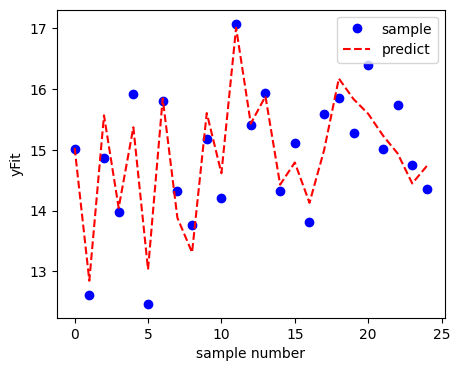

In [35]:
# 回归分析(第二版 p154,示例)
# 多元线性回归
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy import stats
import matplotlib.pyplot as plt

# 导入数据
data = pd.read_table(r'/Users/double/Desktop/竞赛/数学建模/程序及数据/07第7章  数理统计/data7_22.txt', sep='\t', header=None)
x = data.iloc[:, 2:5].values
x0 = np.ones((x.shape[0], 1))
x = np.hstack((x0, x))
y = data.iloc[:, 1].values

# 采用最小二乘法建立多元线形回归方程
def linearRegression(x, y):
    model = sm.OLS(y, x)
    results = model.fit()
    return results

results = linearRegression(x, y)
yFit = results.fittedvalues
print(results.summary())

# 进行假设检验与区间估计
def hypothesisTest(results, n, m, alpha=0.05):
    t = results.tvalues
    f = results.fvalue
    # 求解回归系数的F检验
    F = stats.f.interval(1 - alpha / 2, m, n - m - 1)
    if f < F[0] or f > F[1]:
        print("模型通过检验")
    else:
        print("模型未通过检验")
    # 求解回归系数的t检验
    T = stats.t.isf(alpha / 2, n - m - 1)
    for i in range(m + 1):
        if abs(t[i]) < T:
            print(f"变量x{i}对模型影响不显著")
        else:
            print(f"变量x{i}对模型影响显著")

n = 25
m = 3
hypothesisTest(results, n, m)

# 拟合结果绘图
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(range(len(y)), y, 'bo', label='sample')
ax.plot(range(len(yFit)), yFit, 'r--', label='predict')
ax.legend(loc='best')
plt.xlabel('sample number')
plt.ylabel('yFit')
plt.show()

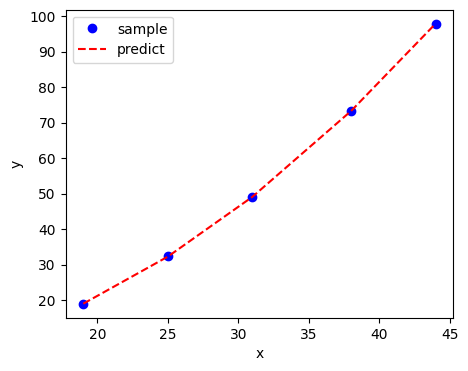

In [43]:
# 拟合算法(第二版 P93,示例)
import numpy as np
import matplotlib.pyplot as plt
# 导入数据
x = np.array([19, 25, 31, 38, 44])
y = np.array([19.0, 32.3, 49.0, 73.3, 97.8])

# 拟合算法
def fittingAlgorithm(x, y, deg):
    z = np.polyfit(x, y, deg)
    p = np.poly1d(z)
    return p

p = fittingAlgorithm(x, y, 2)

# 拟合结果绘图
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(x, y, 'bo', label='sample')
ax.plot(x, p(x), 'r--', label='predict')
ax.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



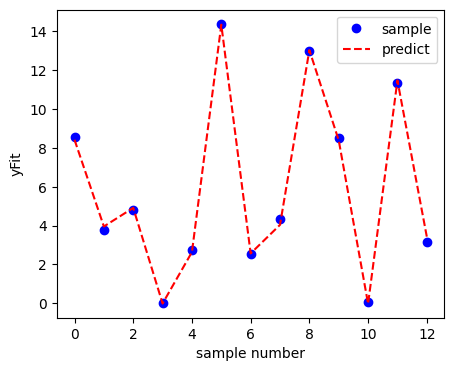

In [57]:
# 非线性函数拟合(第二版, P157,示例)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# 导入数据
data = pd.read_table(r'/Users/double/Desktop/竞赛/数学建模/程序及数据/07第7章  数理统计/data7_24.txt', sep='\t', header=None)

x = data.iloc[:, 2:5].values
y = data.iloc[:, 1].values

# 拟合函数
def fitFunc(x, beta1, beta2, beta3, beta4, beta5):
    return (beta4 * x[:, 1] + x[:, 2] / beta5) / (1 + beta1 * x[:, 0] + beta2 * x[:, 1] + beta3 * x[:, 2])

popt, pcov = curve_fit(fitFunc, x, y)

# 拟合结果绘图
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(range(len(y)), y, 'bo', label='sample')
ax.plot(range(len(y)), fitFunc(x, *popt), 'r--', label='predict')
ax.legend(loc='best')
plt.xlabel('sample number')
plt.ylabel('yFit')
plt.show()

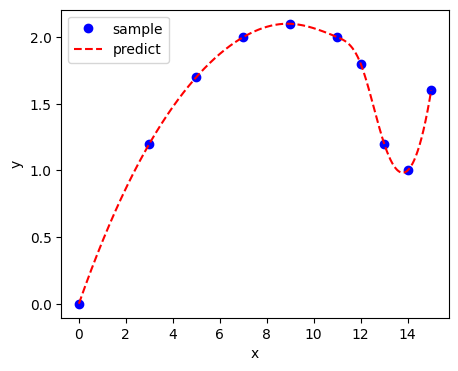

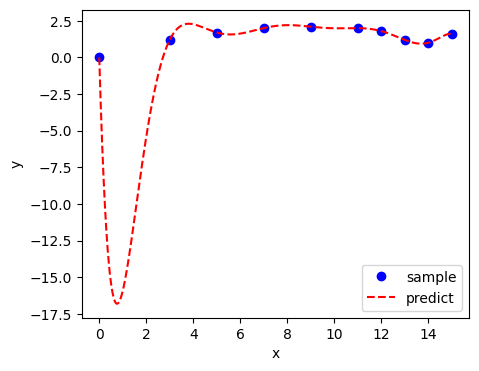

In [73]:
# 插值算法(第二版 P94,示例)
# 三次样条插值
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, lagrange

# 导入数据
x = np.array([0,  3,   5,   7,   9,  11,  12,  13,  14,  15])
y = np.array([0, 1.2, 1.7, 2.0, 2.1, 2.0, 1.8, 1.2, 1.0, 1.6])

# 插值算法
def interpolationAlgorithm(x, y, kind):
    f = interp1d(x, y, kind=kind)
    return f

f = interpolationAlgorithm(x, y, 'cubic')

# 插值结果绘图
xfit = np.linspace(0, 15, 1000)
yfit = f(xfit)
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(x, y, 'bo', label='sample')
ax.plot(xfit, yfit, 'r--', label='predict')
ax.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# lagrange插值
def lagrangeInterpolation(x, y):
    f = lagrange(x, y)
    return f

f = lagrangeInterpolation(x, y)

# 插值结果绘图
xfit = np.linspace(0, 15, 1000)
yfit = f(xfit)
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(x, y, 'bo', label='sample')
ax.plot(xfit, yfit, 'r--', label='predict')
ax.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

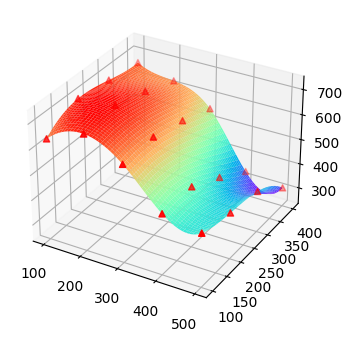

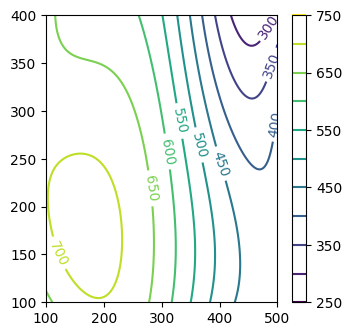

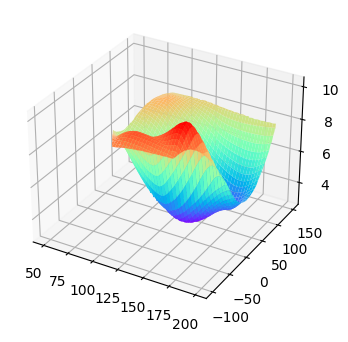

In [63]:
# 二维插值
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata, RegularGridInterpolator, interp2d

# 网格节点插值
# 导入数据
x = np.linspace(100, 500, 5)
y = np.linspace(100, 400, 4)
# z = np.array([[636, 697, 624, 478, 450],
#               [698, 712, 630, 478, 420],
#               [680, 674, 598, 412, 400],
#               [662, 626, 552, 334, 310]])
X, Y = np.meshgrid(x, y, indexing='ij')
z = np.array([[636, 698, 680, 662],
              [697, 712, 674, 626],
              [624, 630, 598, 552],
              [478, 478, 412, 334],
              [450, 420, 400, 310]])

# 插值算法
def regularInterpolationAlgorithm(x, y, z, kind):
    f = RegularGridInterpolator((x, y), z, method=kind)
    return f

# fRegular = regularInterpolationAlgorithm(x, y, z, 'cubic')
# def regularInterpolationAlgorithm(x, y, z, kind):
#     f = interp2d(x, y, z, kind=kind)
#     return f

fRegular = regularInterpolationAlgorithm(x, y, z, 'cubic')

# 插值结果绘图
xReFit = np.linspace(100, 500, 500)
yReFit = np.linspace(100, 400, 500)
XFit, YFit = np.meshgrid(xReFit, yReFit, indexing='ij')
zReFit = fRegular((XFit, YFit))

fig = plt.figure(figsize=(5, 4))
ax = plt.axes(projection='3d')
ax.plot_surface(XFit, YFit, zReFit, cmap='rainbow')
ax.scatter(X, Y, z, c='r', marker='^')
plt.show()

fig = plt.figure(figsize=(3.73, 3.73))
equalLine = plt.contour(XFit, YFit, zReFit, 10, cmap='viridis')
plt.clabel(equalLine, inline=True, fontsize=10, fmt="%d")
plt.colorbar(equalLine)
plt.show()

# 散列点插值
# 导入数据
x = np.array([129, 140, 103.5, 88, 185.5, 195, 105, 157.5, 107.5, 77, 81, 162, 162, 117.5])
y = np.array([7.5, 141.5, 23, 147, 22.5, 137.5, 85.5, -6.5, -81, 3, 56.5, -66.5, 84, -33.5])
z = np.array([4, 8 ,6, 8, 6, 8, 8, 9, 9, 8, 8, 9, 4, 9])
X, Y = np.mgrid[50:200:0.5, -100:150:0.5]

# 插值算法
def scatteredInterpolationAlgorithm(x, y, z, X, Y, kind):
    f = griddata((x, y), z, (X, Y), method=kind)
    return f

fScattered = scatteredInterpolationAlgorithm(x, y, z, X, Y, 'cubic')
# 插值结果绘图
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, fScattered, cmap='rainbow')
plt.show()


In [38]:
# K-Means聚类分析(https://blog.csdn.net/youcans/article/details/116596017)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# 导入数据
data = pd.read_table(r'/Users/double/Desktop/竞赛/数学建模/程序及数据/10第10章  多元分析/anli10_1.txt', sep='\t', header=None)
rawData = data.values

# 数据标准化
def standardization(rawX):
    row, col = rawX.shape
    X = rawData.copy()
    for i in range(col):
        x = rawX[:, i]
        x = (x - np.mean(x)) / np.std(x)
        X[:, i] = x
    return X

X = standardization(rawData)

# 聚类分析
def clusterAnalysis(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    return kmeans

n_clusters = 4
kMeans = clusterAnalysis(X, n_clusters)
labels = kMeans.labels_
centers = kMeans.cluster_centers_
centers, labels

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([[ 1.52987871,  2.10479182,  1.97836141,  1.92037518,  1.54974999,
          1.50344182,  1.13526879,  1.13595799,  0.83939748,  1.38149832],
        [-0.32558635, -0.28230636, -0.28071191, -0.27988803, -0.28228409,
         -0.28494074,  0.01965142,  0.09458383, -0.26439737, -0.31101153],
        [ 4.44318512,  3.9725159 ,  4.16079449,  4.20994153,  4.61768098,
          4.65296699,  2.45321197,  0.4021476 ,  4.22779099,  2.44672575],
        [ 0.31835808, -0.56222029, -0.54985976, -0.52674552, -0.33003935,
         -0.26816609, -2.60751756, -2.51932966,  0.35167418,  1.28278289]]),
 array([2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 3, 1, 1, 1, 1, 3], dtype=int32))

第27个样本属于第二类
第28个样本属于第二类
第29个样本属于第二类


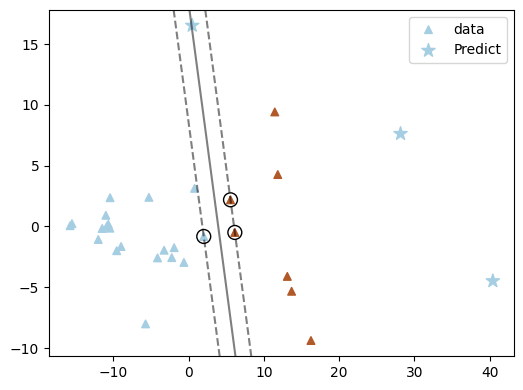

In [63]:
# SVM聚类分析(第二版, P209,示例)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, NuSVC, LinearSVC
import pandas as pd
from sklearn.decomposition import PCA

# 导入数据
rawData = pd.read_table(r'/Users/double/Desktop/竞赛/数学建模/程序及数据/09第9章  支持向量机/data9_1.txt', sep='\t', header=None)
pca = PCA(n_components=2)
data = pca.fit_transform(rawData)
X = data[:27, :]
y = np.array([1 if i < 20 else 2 for i in range(27)])

# svm建模
modelSVM = SVC(C=100, kernel='linear')
modelSVM.fit(X, y)
svmScore = modelSVM.score(X, y)

# svm预测
toPredictData = data[27:, :]
svmPredict = modelSVM.predict(toPredictData)

# 输出结果
for i in range(3):
    if svmPredict[i] == 1:
        print(f"第{i + 27}个样本属于第一类")
    else:
        print(f"第{i + 27}个样本属于第二类")

# 绘制数据
plt.figure(figsize=(6, 4.5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, marker='^', cmap=plt.cm.Paired, label='data')
plt.scatter(toPredictData[:, 0], toPredictData[:, 1], c=svmPredict, s=100, marker='*', cmap=plt.cm.Paired, label='Predict')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
XX, YY = np.meshgrid(xx, yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = modelSVM.decision_function(xy).reshape(XX.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(modelSVM.support_vectors_[:, 0], modelSVM.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.legend()
plt.show()

0.98
1.0


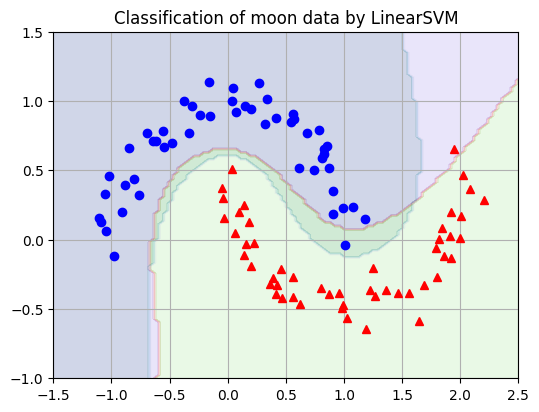

In [73]:
# NuSVC(https://blog.csdn.net/youcans/article/details/116885068)
import numpy as np
from sklearn.svm import NuSVC
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# 数据准备：生成训练数据集，生成等高线网格数据
X, y = make_moons(n_samples=100, noise=0.1, random_state=27)
x0s = np.linspace(-1.5, 2.5, 100)  
x1s = np.linspace(-1.0, 1.5, 100) 
x0, x1 = np.meshgrid(x0s, x1s)
Xtest = np.c_[x0.ravel(), x1.ravel()] 

# SVC 建模，训练和输出
modelSVM1 = SVC(kernel='poly', degree=3, coef0=0.2)
modelSVM1.fit(X, y) 
yPred1 = modelSVM1.predict(Xtest).reshape(x0.shape) 
print(modelSVM1.score(X, y))

# NuSVC 建模，训练和输出
modelSVM2 = NuSVC(kernel='rbf', gamma='scale', nu=0.1)
modelSVM2.fit(X, y)
yPred2 = modelSVM2.predict(Xtest).reshape(x0.shape)
print(modelSVM2.score(X, y))

# 绘制数据
fig, ax = plt.subplots(figsize=(6, 4.5))  
ax.contourf(x0, x1, yPred1, alpha=0.1, cmap=plt.cm.brg) 
ax.contourf(x0, x1, yPred2, alpha=0.1, cmap='PuBuGn_r') 
ax.plot(X[:, 0][y==0], X[:, 1][y==0], "bo")  
ax.plot(X[:, 0][y==1], X[:, 1][y==1], "r^")
ax.grid(True, which='both')
ax.set_title("Classification of moon data by LinearSVM")
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylab

Training accuracy: 0.875
Test accuracy: 0.7755102040816326
[[13  4]
 [ 7 25]]


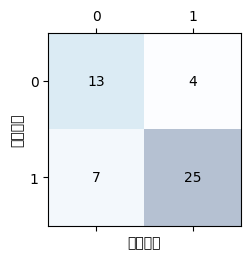

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20551 (\N{CJK UNIFIED

Precision: 0.8621
Recall: 0.7812
F1: 0.8197


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

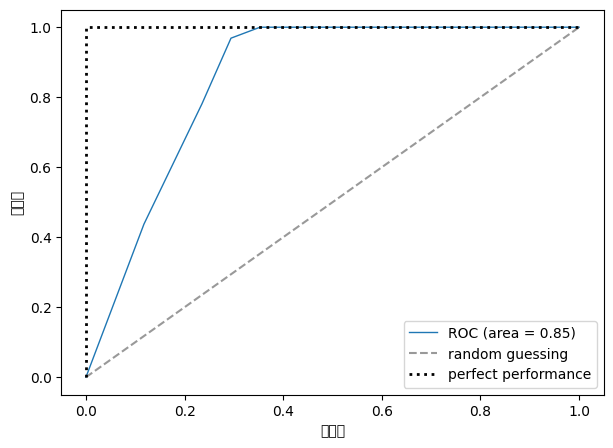

In [78]:
#决策树(https://blog.csdn.net/weixin_43196531/article/details/90581112)
# 导入库
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
# 使文字可以展示
plt.rcParams['font.sans-serif'] = ['SimHei']
# 使负号可以展示
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
data = pd.read_excel('/Users/double/Desktop/VSCode/Python/MathematicalModeling/附件一：2019年某高校本科生寒假回程购票信息调查表.xlsx')

# 数据预处理
# 设置 X 和 y
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
# 设置训练数据集和测试数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# 数据标准化
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# 将训练数据标准化
X_train_std = stdsc.fit_transform(X_train)
# 将测试数据标准化
X_test_std = stdsc.transform(X_test)

# 导入决策树
# 以熵作为不纯度度量标准
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
tree.fit(X_train, y_train)

# 决策树评价
# 打印训练集精确度
print('Training accuracy:', tree.score(X_train, y_train))
# 打印测试集精确度
print('Test accuracy:', tree.score(X_test, y_test))
# 绘制混淆矩阵
from sklearn.metrics import confusion_matrix
y_pred = tree.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
# 将混淆矩阵可视化
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

# 绘图
plt.xlabel('预测类标')
plt.ylabel('真实类标')
plt.show()

# 获取模型的准确率和召回率
# 准确率
print('Precision: %.4f' % precision_score(y_true=y_test, y_pred=y_pred))
# 召回率
print('Recall: %.4f' % recall_score(y_true=y_test, y_pred=y_pred))
# F1
print('F1: %.4f' % f1_score(y_true=y_test, y_pred=y_pred))

# 设置图形大小
fig = plt.figure(figsize=(7, 5))
# 计算 预测率---使用测试数据集
probas = tree.fit(X_train, y_train).predict_proba(X_test)
# 计算 fpr,tpr    
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
# 计算 AUC 值
roc_auc = auc(fpr, tpr)
# 画 ROC 曲线
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' 
                    % ( roc_auc))
# 画斜线
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guessing')
# 画完美表现 线
plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')
# 设置坐标轴范围
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
# 设置坐标轴标题
plt.xlabel('假正率')
plt.ylabel('真正率')
# 设置标题
plt.title('')
# 设置图例位置
plt.legend(loc="lower right")
plt.show()

# #画图方法1-生成dot文件
# from sklearn.tree import export_graphviz #可视化决策树
# with open('treeone.dot', 'w') as f:
#     dot_data = export_graphviz(tree, out_file=None)
#     f.write(dot_data)

# #画图方法2-生成pdf文件
# import pydotplus
# from sklearn.externals.six import StringIO

# dot_data = StringIO()
# export_graphviz(tree, out_file = dot_data, feature_names=X.columns, filled=True,rounded=True, special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_pdf("treetwo.pdf")

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylab

Training accuracy: 0.9821428571428571
Test accuracy: 0.8979591836734694
[[14  3]
 [ 2 30]]


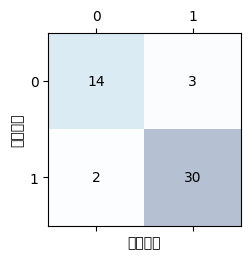

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20551 (\N{CJK UNIFIED

Precision: 0.9091
Recall: 0.9375
F1: 0.9231


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

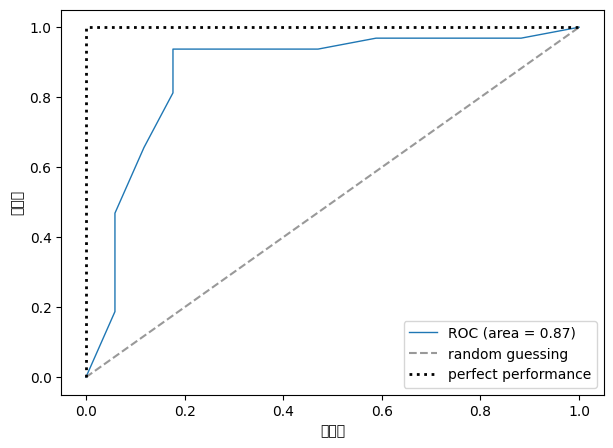

In [80]:
# 随机森林(https://blog.csdn.net/weixin_43196531/article/details/90581112)
# 导入库
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
# 使文字可以展示
plt.rcParams['font.sans-serif'] = ['SimHei']
# 使负号可以展示
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
data = pd.read_excel('/Users/double/Desktop/VSCode/Python/MathematicalModeling/附件一：2019年某高校本科生寒假回程购票信息调查表.xlsx')

# 数据预处理
# 设置 X 和 y
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
# 设置训练数据集和测试数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# 数据标准化
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# 将训练数据标准化
X_train_std = stdsc.fit_transform(X_train)
# 将测试数据标准化
X_test_std = stdsc.transform(X_test)

# 随机森林
#  n_estimator = 10表示有10颗决策树
#  n_jobs = 2表示使用CPU的两个内核
forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, random_state = 1, n_jobs = 2)
forest.fit(X_train, y_train)

# 随机森林评价
# 打印训练集精确度
print('Training accuracy:', forest.score(X_train, y_train))
# 打印测试集精确度
print('Test accuracy:', forest.score(X_test, y_test))
# 绘制混淆矩阵
from sklearn.metrics import confusion_matrix
y_pred = forest.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
# 将混淆矩阵可视化
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

# 绘图
plt.xlabel('预测类标')
plt.ylabel('真实类标')
plt.show()

# 获取模型的准确率和召回率
# 准确率
print('Precision: %.4f' % precision_score(y_true=y_test, y_pred=y_pred))
# 召回率
print('Recall: %.4f' % recall_score(y_true=y_test, y_pred=y_pred))
# F1
print('F1: %.4f' % f1_score(y_true=y_test, y_pred=y_pred))

# 设置图形大小
fig = plt.figure(figsize=(7, 5))
# 计算 预测率---使用测试数据集
probas = forest.fit(X_train, y_train).predict_proba(X_test)
# 计算 fpr,tpr    
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
# 计算 AUC 值
roc_auc = auc(fpr, tpr)
# 画 ROC 曲线
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' 
                    % ( roc_auc))
# 画斜线
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guessing')
# 画完美表现 线
plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')
# 设置坐标轴范围
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
# 设置坐标轴标题
plt.xlabel('假正率')
plt.ylabel('真正率')
# 设置标题
plt.title('')
# 设置图例位置
plt.legend(loc="lower right")
plt.show()


序列非平稳
序列有上升趋势
序列非平稳
序列有上升趋势


/var/folders/tt/2pywz1vd2877bd78p3q3v99h0000gn/T/ipykernel_12555/2309362528.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  T = qs * np.sqrt(n - 2) / np.sqrt(1 - qs**2)


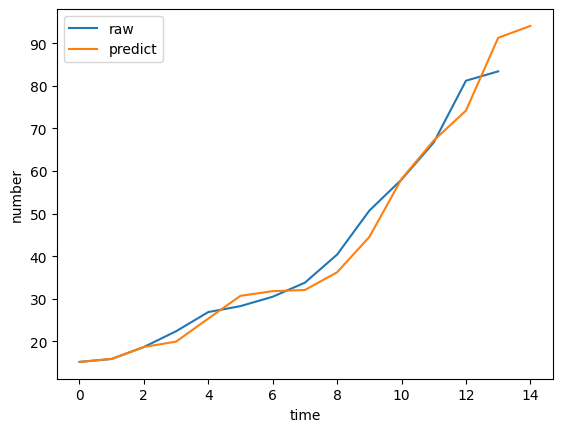

In [88]:
# 时间序列预测(第二版 P419,示例)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.ar_model import AutoReg

# 导入数据
data = np.array([15.2, 15.9, 18.7, 22.4, 26.9, 28.3, 30.5, 33.8, 40.4, 50.7, 58, 66.7, 81.2, 83.4])

# 检验是否平稳
def testStationarity(data):
    n = data.shape[0]
    t = np.arange(1, n + 1)
    Rt = stats.rankdata(data)
    qs = 1 - (6 / (n * (n**2 - 1))) * np.sum((t - Rt)**2)
    T = qs * np.sqrt(n - 2) / np.sqrt(1 - qs**2)
    tAlpha = stats.t.isf(0.05 / 2, n - 2)
    if np.abs(T) > tAlpha:
        print("序列非平稳")
    else:
        print("序列平稳")
    if qs > 0:
        print("序列有上升趋势")
    else:
        print("序列有下降趋势")

testStationarity(data)

# 差分
def Diff(data):
    n = data.shape[0]
    dataDiff = np.zeros((n - 1))
    for i in range(n - 1):
        dataDiff[i] = data[i + 1] - data[i]
    return dataDiff

firstDiffData = Diff(data)
testStationarity(firstDiffData)

# 建立AR模型
n = data.shape[0]
arModel = AutoReg(firstDiffData, lags=2, trend='n')
arModel_fit = arModel.fit()
diffHat = arModel_fit.predict(start=0, end=n-2)
diffHat[0] = firstDiffData[0]
diffHat[1] = firstDiffData[1]
diffHat = np.append(diffHat, arModel_fit.forecast(1))
dataHat = np.concatenate(([data[0]], data + diffHat))
delta = np.abs((dataHat[:-1] - data) / data)

# 绘图
plt.plot(data, label="raw")
plt.plot(dataHat, label="predict")
plt.xlabel("time")
plt.ylabel("number")
plt.legend()
plt.show()

best_x is [0.   0.05 0.5 ] best_y is [0.25]


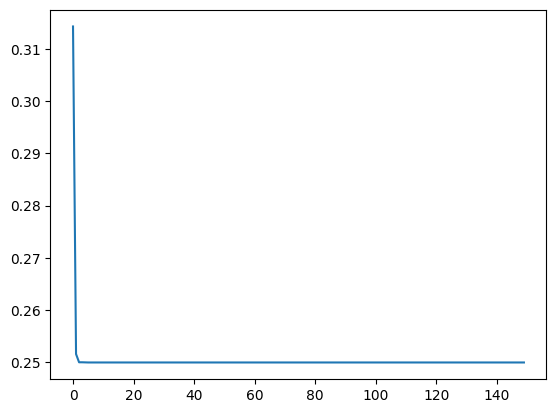

In [1]:
# 粒子群算法
from sko.PSO import PSO
import matplotlib.pyplot as plt

# 定义问题
def demo_func(x):
    x1, x2, x3 = x
    return x1 ** 2 + (x2 - 0.05) ** 2 + x3 ** 2

# 定义约束条件
constraint_ueq = (
    lambda x: (x[0] - 1) ** 2 + (x[1] - 0) ** 2 - 0.5 ** 2,
)

# 粒子群算法
pso = PSO(func=demo_func, n_dim=3, pop=40, max_iter=150, lb=[0, -1, 0.5], ub=[1, 1, 1], w=0.8, c1=0.5, c2=0.5)
pso.run()
print('best_x is', pso.gbest_x, 'best_y is', pso.gbest_y)

# 绘图
plt.plot(pso.gbest_y_hist)
plt.show()

best_x is  [-2.07776530e-05  5.00105360e-02 -3.51192344e-06] best_y is 5.55051040927764e-10


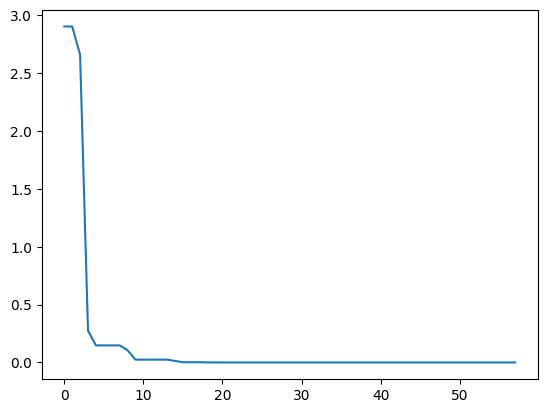

In [14]:
# 模拟退火算法
from sko.SA import SA
import matplotlib.pyplot as plt
import pandas as pd

# 定义问题
demo_func = lambda x: x[0] ** 2 + (x[1] - 0.05) ** 2 + x[2] ** 2

# 模拟退火算法
sa = SA(func=demo_func, x0=[1, 1, 1], T_max=1, T_min=1e-9, L=300, max_stay_counter=150)
best_x, best_y = sa.run()
print('best_x is ', best_x, 'best_y is', best_y)

# 绘制退火曲线
plt.plot(pd.DataFrame(sa.best_y_history).cummin(axis=0))
plt.show()

[ 9 15 17 16 28 75 31 36 33 65 46 47 12 14 11 22 13 18 21 20 19 34 38 41
 29 23 70 67 45 43 40 27 59 30 55 58 66 69 54 32 24 62 71 77 35 60 48 49
  2  3 37 39 57 76 63 42 73 25 44 53 26 74 52 61  5  6 51  0 68 64 56 50
 72  1  4 10  8  7] 5449.60088152335 5449.60088152335


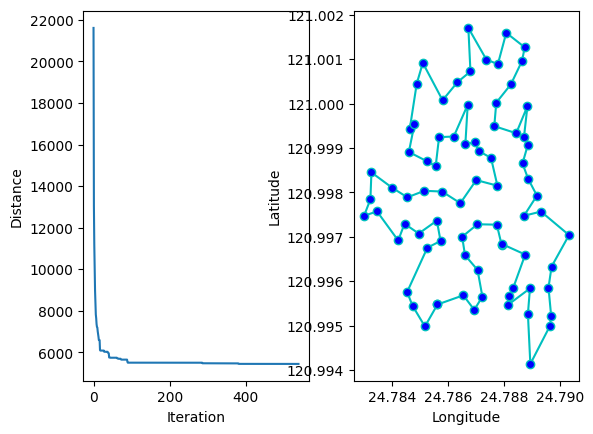

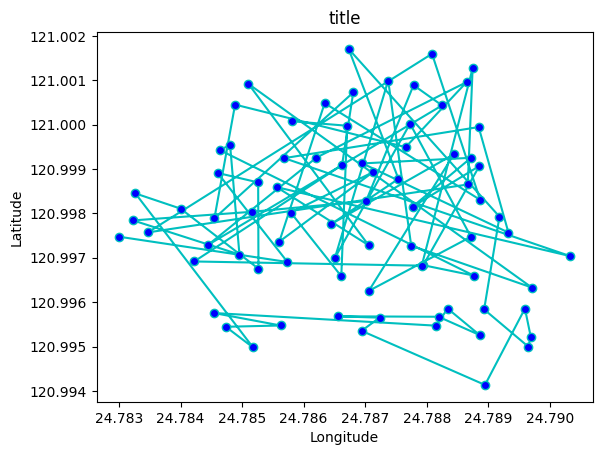

In [19]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
import sys

points_coordinate = np.loadtxt('nctu.csv', delimiter=',')
num_points = points_coordinate.shape[0]
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
distance_matrix = distance_matrix * 111000  # 1 degree of lat/lon ~ = 111000m


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


# %%
from sko.SA import SA_TSP

sa_tsp = SA_TSP(func=cal_total_distance, x0=range(num_points), T_max=100, T_min=1, L=10 * num_points)

best_points, best_distance = sa_tsp.run()
print(best_points, best_distance, cal_total_distance(best_points))
# %% Plot the best routine
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1, 2)

best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(sa_tsp.best_y_history)
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Distance")
ax[1].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
plt.show()

# %% Plot the animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

best_x_history = sa_tsp.best_x_history

fig2, ax2 = plt.subplots(1, 1)
ax2.set_title('title', loc='center')
line = ax2.plot(points_coordinate[:, 0], points_coordinate[:, 1],
                marker='o', markerfacecolor='b', color='c', linestyle='-')
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
plt.ion()
p = plt.show()


def update_scatter(frame):
    ax2.set_title('iter = ' + str(frame))
    points = best_x_history[frame]
    points = np.concatenate([points, [points[0]]])
    point_coordinate = points_coordinate[points, :]
    plt.setp(line, 'xdata', point_coordinate[:, 0], 'ydata', point_coordinate[:, 1])
    return line


ani = FuncAnimation(fig2, update_scatter, blit=True, interval=25, frames=len(best_x_history))
plt.show()